### Importing Libraries and Data

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
sns.set()

In [2]:
data_deaths = pd.read_csv('CovidDeaths.csv')
data_vaccinations = pd.read_csv('CovidVaccinations.csv')

In [3]:
df_d = data_deaths.copy()
df_v = data_vaccinations.copy()

In [43]:
df_d['date'] = pd.to_datetime(df_d['date'])
df_d.head()

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,2020-02-24,38928341.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,38928341.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,38928341.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,38928341.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,38928341.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_v['date'] = pd.to_datetime(df_d['date'])
df_v.head()

,iso_code,continent,location,date,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


### Total cases vs total deaths

In [45]:
def death_percentage_by_country(country):
    columns = ['location', 'date', 'total_cases', 'total_deaths']
    df_d_sample = df_d[columns].loc[df_d['location'] == country]
    df_d_sample['death_percentage'] = np.round(100 * df_d_sample['total_deaths']/df_d_sample['total_cases'], 2)
    return df_d_sample

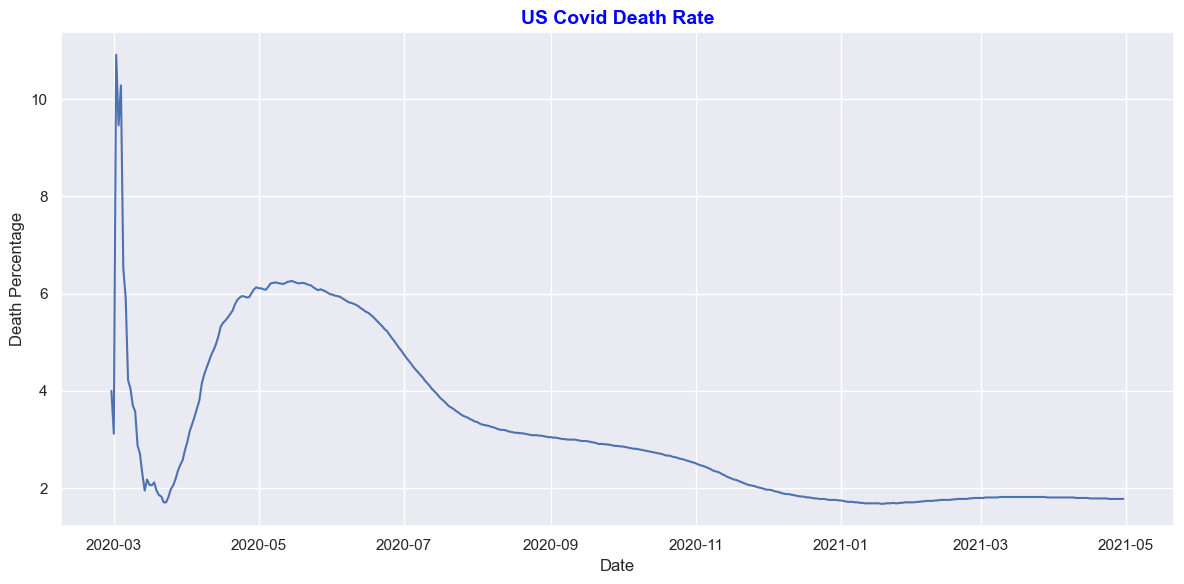

In [88]:
font_dict = {
    'family': 'Arial',
    'size': 14,
    'weight': 'bold',
    'color': 'blue'
}
df = death_percentage_by_country('United States')
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x = 'date', y = 'death_percentage')
plt.xlabel('Date')
plt.ylabel('Death Percentage')
plt.title('US Covid Death Rate', fontdict = font_dict)
plt.tight_layout()

### Total cases vs population

In [47]:
def case_percentage_by_country(country):
    columns = ['location', 'date', 'total_cases', 'population']
    df_d_sample = df_d[columns].loc[df_d['location'] == country]
    df_d_sample['case_percentage'] = np.round(100 * df_d_sample['total_cases']/df_d_sample['population'], 2)
    df_d_sample.set_index('date', inplace=True)
    return df_d_sample

Text(0.5, 1.0, 'US Covid Case Density')

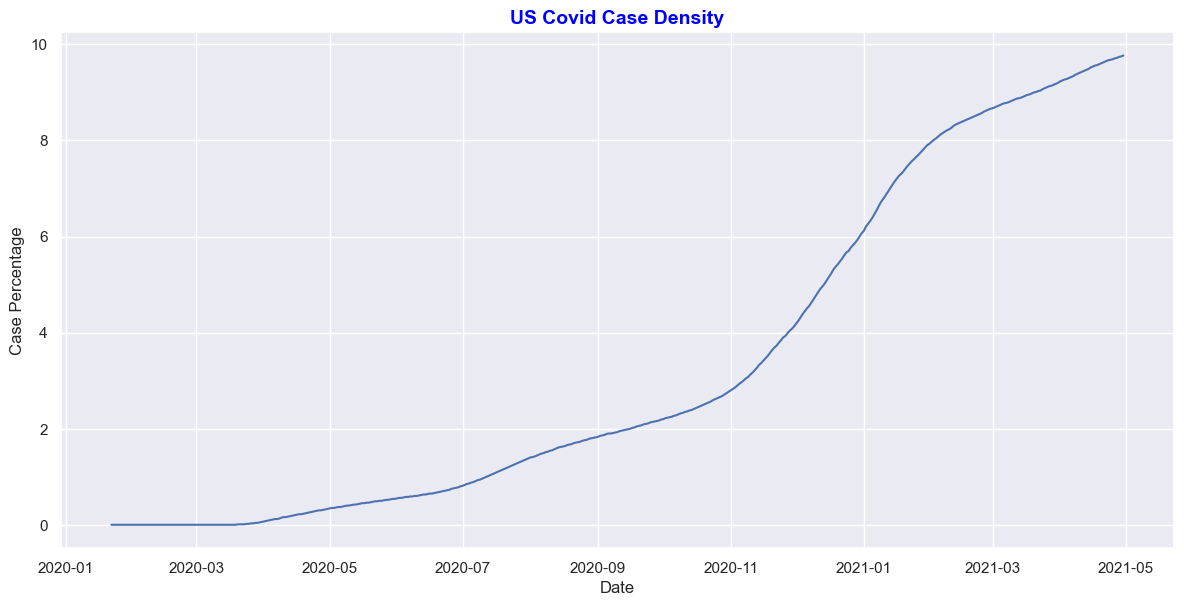

In [87]:
df = case_percentage_by_country('United States')
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x = 'date', y = 'case_percentage')
plt.xlabel('Date')
plt.ylabel('Case Percentage')
plt.tight_layout()
plt.title('US Covid Case Density', fontdict = font_dict)

### Countries with the highest infection rate compared to the population

Text(0.5, 0, 'Max Infection Rate')

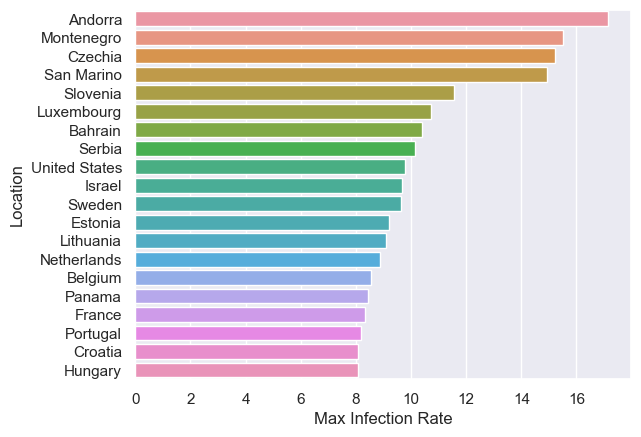

In [89]:
filter_null_continents = ~df_d['continent'].isna()
df = df_d[filter_null_continents].groupby(['location', 'population'])['total_cases'].max().reset_index()
df['max_case_percentage'] = np.round(100 * df['total_cases'] / df['population'], 2)
top_infection_rate_countries = df.sort_values(by = 'max_case_percentage', ascending = False).head(20)
sns.barplot(data = top_infection_rate_countries, y = 'location', x = 'max_case_percentage')
plt.ylabel('Location')
plt.xlabel('Max Infection Rate')

### Showing countries with the highest death count per country

Text(0.5, 0, 'Max Death Count')

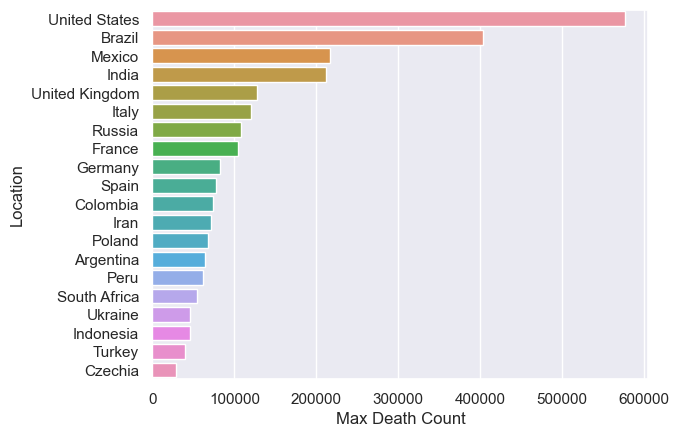

In [90]:
df = df_d[filter_null_continents].groupby(['location'])['total_deaths'].max().reset_index()
df.columns = ['location', 'death_count']
top_death_count_countries = df.sort_values(by = 'death_count', ascending = False).head(20)
sns.barplot(data = top_death_count_countries, y = 'location', x = 'death_count')
plt.ylabel('Location')
plt.xlabel('Max Death Count')

### Showing countries with the highest death count where the continent is null

Text(0.5, 0, 'Max Death Count')

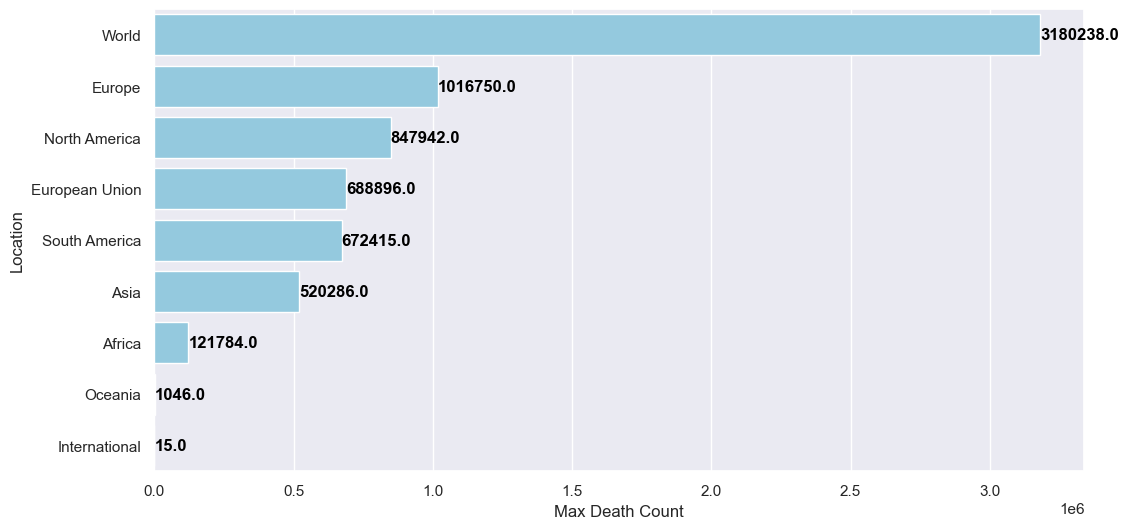

In [97]:
df = df_d[~filter_null_continents].groupby(['location'])['total_deaths'].max().reset_index()
df.columns = ['location', 'death_count']
top_death_count_countries = df.sort_values(by = 'death_count', ascending = False)
plt.figure(figsize=(12,6))
ax = sns.barplot(x='death_count', y='location', data=top_death_count_countries, color='skyblue')

# Add text labels on bars
for index, value in enumerate(top_death_count_countries['death_count']):
    ax.text(value, index, str(value), va='center', ha='left', color='black', fontsize=12, weight='bold')
plt.ylabel('Location')
plt.xlabel('Max Death Count')

### Show death count by continent

Text(0.5, 0, 'Max Death Count')

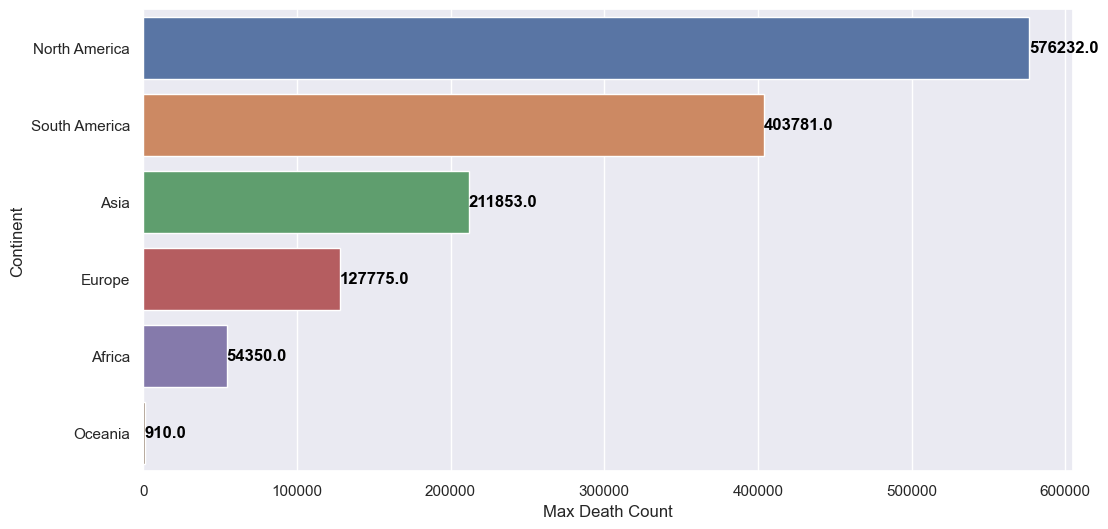

In [103]:
df = df_d.groupby(['continent'])['total_deaths'].max().reset_index()
df.columns = ['continent', 'death_count']
top_death_count_continent = df.sort_values(by = 'death_count', ascending = False)
plt.figure(figsize=(12,6))
ax = sns.barplot(x='death_count', y='continent', data=top_death_count_continent)

# Add text labels on bars
for index, value in enumerate(top_death_count_continent['death_count']):
    ax.text(value, index, str(value), va='center', ha='left', color='black', fontsize=12, weight='bold')
plt.ylabel('Continent')
plt.xlabel('Max Death Count')

### Global deaths per case vs time

<Axes: xlabel='date'>

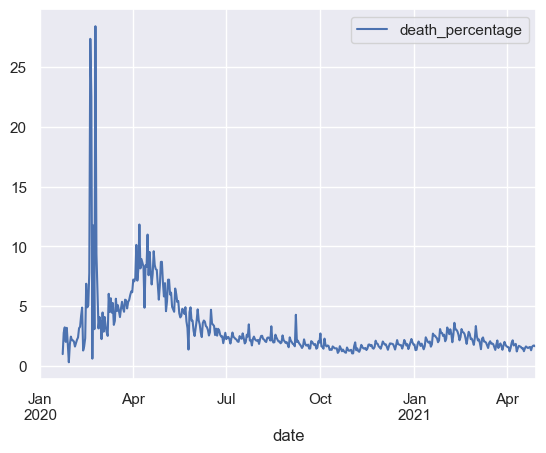

In [124]:
filter_null_continents = ~df_d['continent'].isna()
df = df_d[filter_null_continents][['date','new_cases', 'new_deaths']].groupby(['date'])[['new_cases', 'new_deaths']].sum().reset_index()
df['death_percentage'] = np.round(100 * df['new_deaths'] / df['new_cases'], 2)
# df.sort_values(by = 'death_percentage', ascending = False, inplace = True)
df.plot(x = 'date', y = 'death_percentage')

### Proportion of the population that is vaccinated over time

In [177]:
pd.set_option('display.max_columns', None)
df = df_d.merge(df_v, how = 'inner', on = ['location', 'date','iso_code', 'continent'])
df = df[~df['continent'].isna()]
columns = ['date', 'location', 'new_vaccinations', 'population']
df = df[columns]
df['cumsum_vaccinations'] = df[columns].groupby('location')['new_vaccinations'].cumsum()
df['pop_vac_proportion'] = np.round(100 * df['cumsum_vaccinations'] / df['population'],2)

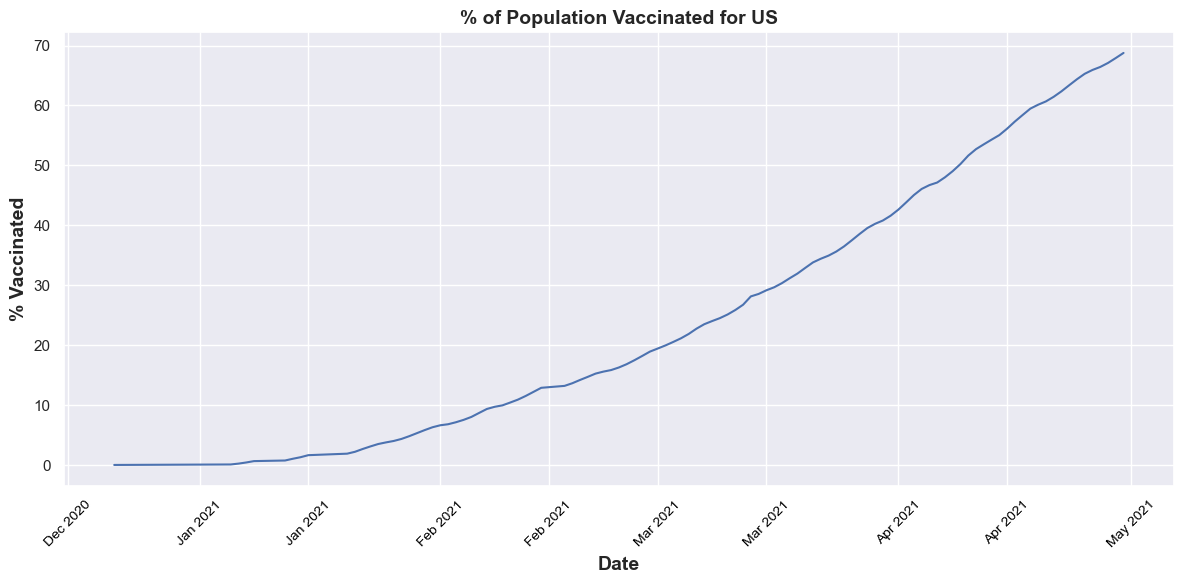

In [200]:
plotting_data = df[(df['location'] == 'United States') & (~df['pop_vac_proportion'].isna())]
def  bold_font(fontsize):
    return {
    'family': 'Arial',
    'weight': 'bold',
    'size': fontsize
    }
plt.figure(figsize=(12,6))
sns.lineplot(data = plotting_data, x = 'date', y = 'pop_vac_proportion')
plt.xlabel('Date',fontdict=bold_font(14))
plt.ylabel('% Vaccinated',fontdict=bold_font(14))
plt.title('% of Population Vaccinated for US', fontdict=bold_font(14))
date_form = DateFormatter("%b %Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tick_params(axis='x', labelsize=10, labelrotation=45, labelcolor='black')
plt.tight_layout()